IMPORT libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [16]:
# import data
data = load_iris()
# df = pd.DataFrame(data.data,columns=data.feature_names)
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Target(species) is in categorical value
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()

In [22]:
df.species = encoder.fit_transform(df.species)

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


EDA -> Exploratory data analysis 
1. Basic Info
- df.shape, df.columns, df.dtypes

- df.head(), df.tail()

- df.info(), df.describe()

2. Missing Values
- df.isnull().sum()

- df.dropna(), df.fillna()

3. Outlier Detection
- sns.boxplot()

- Z-score, IQR method (manual code)

4. Correlation
- df.corr(), sns.heatmap(df.corr())

5. Data Cleaning
- df.duplicated(), df.drop_duplicates()

- df['col'].str.lower(), df.replace()

6. Encoding & Feature Engineering
- pd.get_dummies(), LabelEncoder()

- df['new_col'] = ... (create from existing)

In [24]:
df.shape

(150, 5)

In [25]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [28]:

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
#number of unique values
df.species.nunique()

3

<Axes: >

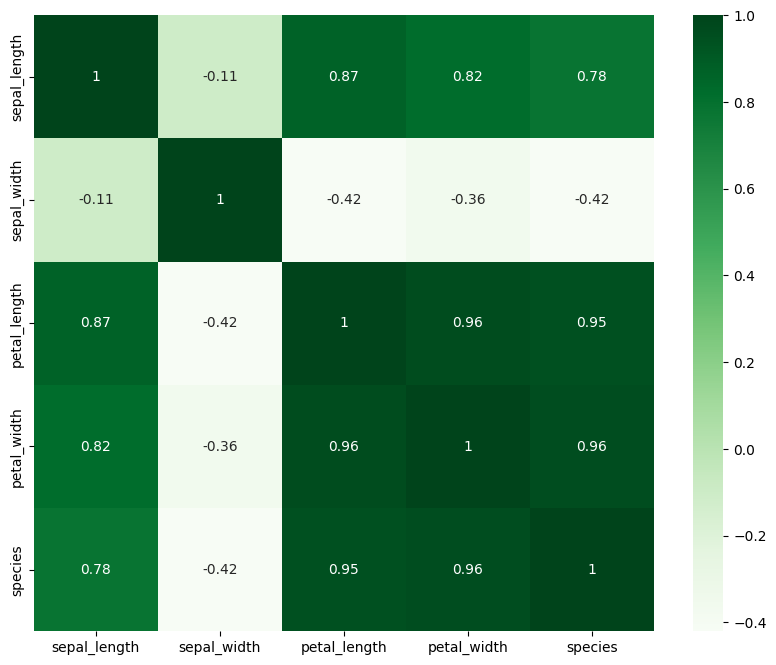

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap="Greens")

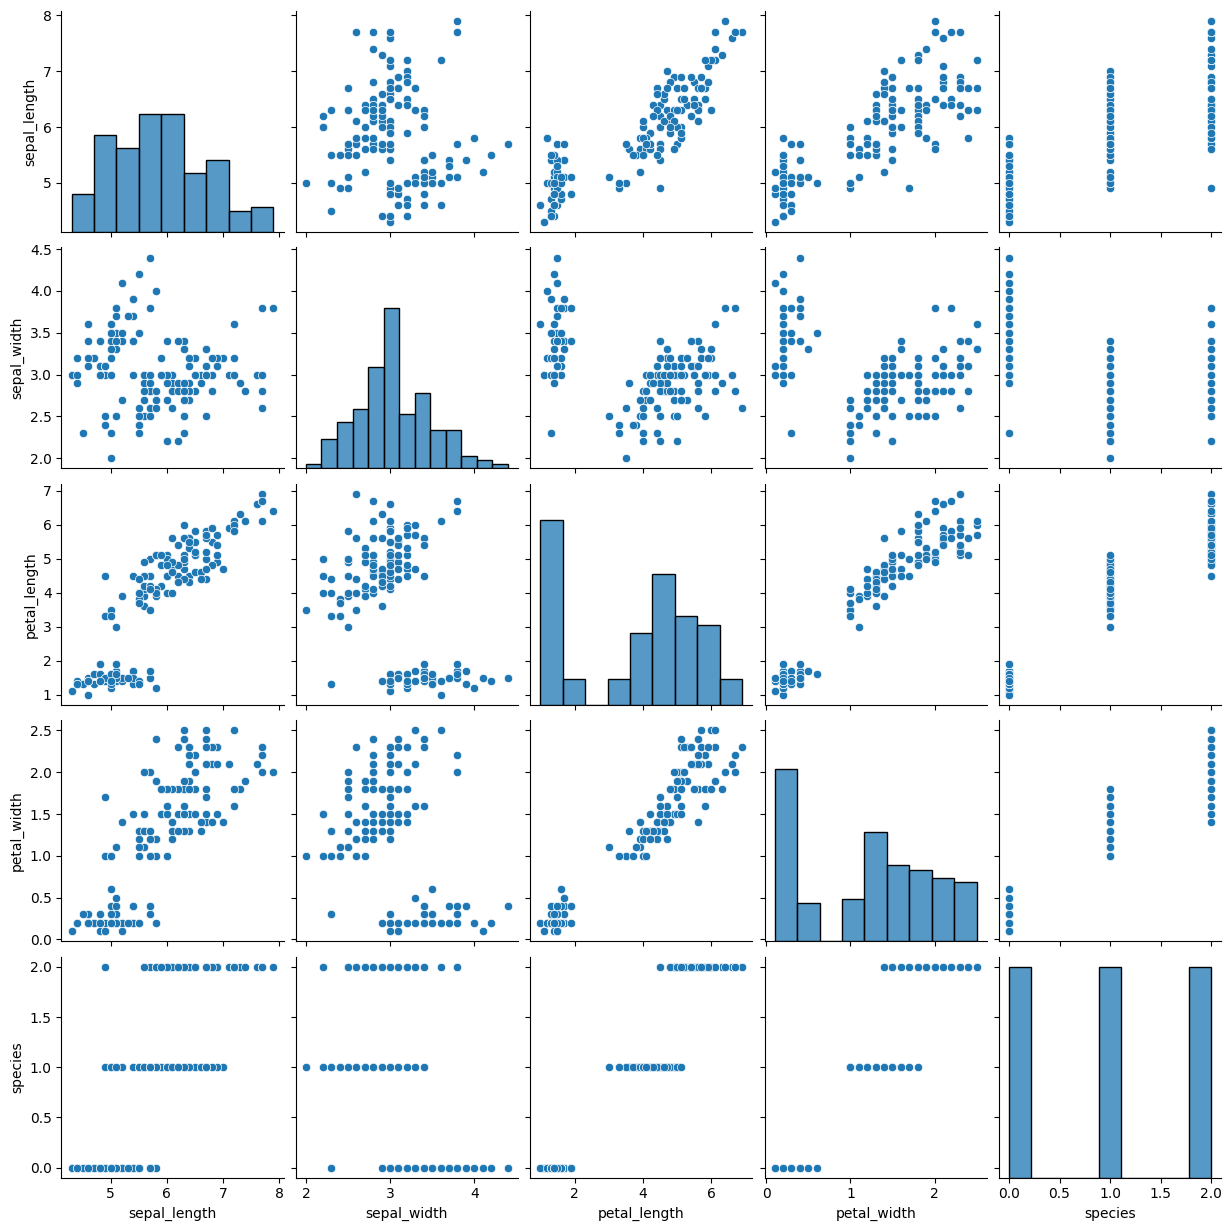

In [35]:
sns.pairplot(df)

ML part

In [36]:
X = np.array(df.iloc[:,[0,1,2,3]])
y = np.array(df.iloc[:,4].values)

In [37]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Feature Scaling - Normalization (MinMax Scaler) & Standardization(StandardScaler)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
#Choosing the model
from sklearn.linear_model import LogisticRegression

In [44]:
classifier = LogisticRegression()

In [45]:
#training the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [46]:
#Testing the model
y_pred = classifier.predict(X_test)

In [47]:
final_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [48]:
final_df.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


<Axes: >

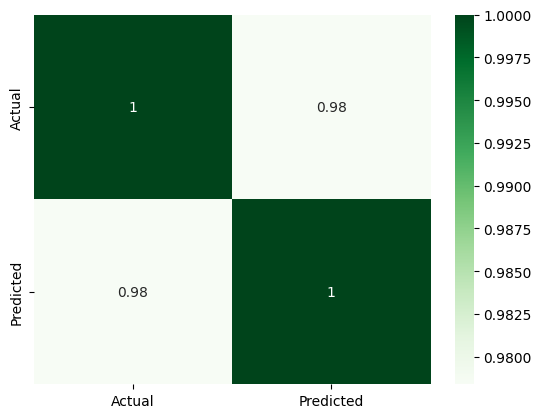

In [49]:
sns.heatmap(final_df.corr(), annot= True, cmap='Greens')

In [50]:
#Performance matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score , accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [54]:
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.02631578947368421
0.02631578947368421
0.02631578947368421
0.9536585365853658
